# Task 2 --To Explore Supervised Machine Learning

In [23]:
# Commands to import required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 

In [24]:
# To read data from the url provided
sthsdata= pd.read_csv("http://bit.ly/w-data")
sthsdata # To print data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [25]:
#To get descriptives of the data given
sthsdata.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


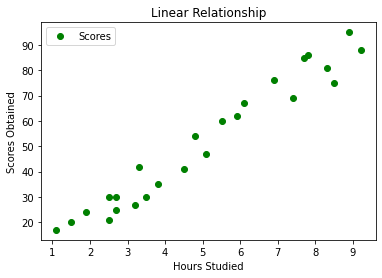

In [26]:
#To plot the given data and to look for any visible patterns
%matplotlib inline
sthsdata.plot(x='Hours', y='Scores', style='o',c= 'green')  
plt.title('Linear Relationship')  
plt.xlabel('Hours Studied')  
plt.ylabel('Scores Obtained')  
plt.show()

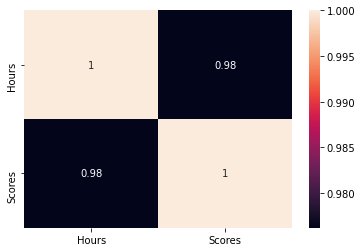

In [27]:
#Above graph suggest positive crrelation among hours and scores
#To verify the above represented relationship let us calculate correlation
import seaborn as sebs
sebs.heatmap(sthsdata.corr(),annot= True)

In [28]:
#Strong positive Correlation

## Model of the data

In [29]:
x= sthsdata.iloc[:,:-1].values  
y= sthsdata.iloc[:,1].values
x,y # to see how are they arranged in arrays

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86], dtype=int64))

In [30]:
# Now we divide the dataset in two parts, one to train maodel and other one to test the model
from sklearn.model_selection import train_test_split # Using train_test_split of Scikit-learn libray  
X_train, X_test, y_train, y_test = train_test_split(x, y,train_size=0.8, random_state=14) 
#you can either use train_size or test_size
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(20, 1) (5, 1) (20,) (5,)


In [31]:
# Now we train the model using Linear Regression
from sklearn.linear_model import LinearRegression  
rm=LinearRegression()
rm.fit(X_train,y_train)

LinearRegression()

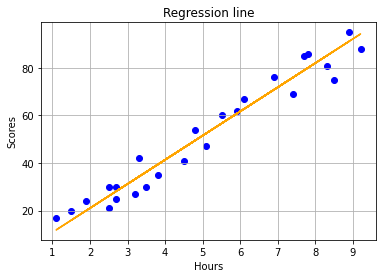

In [32]:
# Reression line of best fit
rl = rm.coef_*x+rm.intercept_
plt.scatter(x, y,color= 'blue')
plt.plot(x, rl, color= 'orange')
plt.grid()
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Regression line")
plt.show()

In [33]:
print("Coefficient:",rm.coef_)
print("Intercept:",rm.intercept_)


Coefficient: [10.17183188]
Intercept: 0.6925589152057867


#### Now to make predictions and answer the question

In [34]:
pred=rm.predict(X_test)
pred

array([87.1531299 , 52.56890151, 20.01903949, 91.22186265, 11.88157398])

In [35]:
# to get data table of actual v/s predicted values
df=pd.DataFrame({'Actual': y_test, 'Predicted': rm.predict(X_test)})
df

,Actual,Predicted
0,75,87.153130
1,47,52.568902
2,24,20.019039
3,95,91.221863
4,17,11.881574


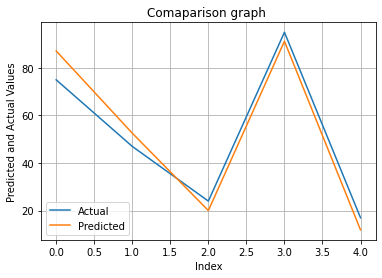

In [36]:
df.plot()
plt.grid()
plt.xlabel('Index')
plt.ylabel("Predicted and Actual Values")
plt.title("Comaparison graph ")
plt.show()

##### Question:What will be predicted score if a student study for 9.25 hrs in a day?

In [37]:
hrs =9.25
pscore = rm.predict([[hrs]])
print("So if a student studies for 9.25 hours, the predicted score based on our model is {}.".format(pscore))

So if a student studies for 9.25 hours, the predicted score based on our model is [94.78200381].


### Evaluating the model

In [39]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))  
print('Accuracy Score:',rm.score(X_test,y_test))

Mean Absolute Error: 6.119911056403735
Mean Squared Error: 47.006376734966764
Accuracy Score: 0.9467192864357015
